In [53]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [61]:
boston_target = pd.read_pickle('../../../week_3/3.5-train-test-cross-val-lab/boston_target.p')
boston_predictors  = pd.read_pickle('../../../week_3/3.5-train-test-cross-val-lab/boston_predictor.p')

In [62]:
boston_predictors.shape, boston_target.shape

((506, 4), (506, 1))

### Splitting data into training and test set

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(boston_predictors, boston_target, test_size = 0.3)

In [67]:
X_train.shape, X_test.shape

((354, 4), (152, 4))

In [101]:
type(X_train - np.mean(X_train))

pandas.core.frame.DataFrame

In [111]:
class Lin_Regression(): 
    '''This class calculates the coefficients for best fit linear line for dataset. Coefficients are calculated by 
    analytical solution using linear algebra, rather than gradient descent or newton method.
    
    Attributes
    -------------
    betas_: array, shape(x.shape[1], 1)
            betas_ are weight or coefficients for every feature in dataset that the best linear fit calculates.
    
    intercept_: array, shape(1,)
            intercept_ represents expected mean value of target feature when coefficient of all predictor features 
            are 0.
    '''
    
    def __init__(self):
        self.betas_ = None
        self.intercept_ = None
        
    def fit(self, x, y):
        x = (x-np.mean(x))
        x = np.c_[np.ones(x.shape[0]), x.values]
        self.coefficients = inverse(x.T.dot(x)).dot(x.T).dot(y.values)
        self.intercept_ = self.coefficients[0]
        self.betas_ = self.coefficients[1:]
        print(self.intercept_)
        print(self.betas_)
    
    def predict(self, x_test):
        x_test = x_test - np.mean(x_test)
        x_test_predict = self.intercept_ + np.dot(x_test, self.betas_)
        return x_test_predict
        
    def r2_score(self, x, y):
        y_hat = self.predict(x)
        ss_total= np.sum((y-np.mean(y))**2)
        ss_residue = np.sum((y-y_hat)**2)
        r2 = 1- float((ss_residue/ss_total))
        return r2


In [112]:
lr=Lin_Regression()

In [113]:
lr.intercept_, lr.betas_

(None, None)

In [115]:
lr.fit(X_train, Y_train)

[ 22.07711864]
[[-0.10829997]
 [ 5.34950839]
 [ 0.0104148 ]
 [-0.48197324]]


In [119]:
lr.intercept_, lr.betas_

(array([ 22.07711864]), array([[-0.10829997],
        [ 5.34950839],
        [ 0.0104148 ],
        [-0.48197324]]))

In [127]:
lr.predict(X_train)

array([[ 25.41911778],
       [ 32.18601184],
       [ 21.5125923 ],
       [ 17.79877232],
       [ 27.57204144],
       [ 22.62196734],
       [ 15.76600935],
       [ 30.57625483],
       [ 18.8867752 ],
       [ 23.45525464],
       [ 39.27380503],
       [ 24.83758825],
       [ 18.80037426],
       [ 30.601755  ],
       [ 14.50546313],
       [ 19.8422545 ],
       [ 20.69452236],
       [ 32.120864  ],
       [ 24.07085921],
       [ 28.82493544],
       [ 25.01837139],
       [ 17.20754523],
       [ 28.84566488],
       [ 26.33079804],
       [ 11.23987642],
       [  5.67477189],
       [ 25.61309141],
       [ 22.33747237],
       [ 35.79989009],
       [ 18.96418817],
       [  4.03767068],
       [ 26.19166076],
       [ 14.99047355],
       [ 19.44381458],
       [ 33.54621545],
       [ 22.79588583],
       [ 18.38429611],
       [ 22.76248871],
       [ 33.93674393],
       [  5.58954426],
       [ 14.90891752],
       [ 21.54740002],
       [ 15.15015634],
       [ 11

In [117]:
lr.r2_score(X_train, Y_train), mean_squared_error(Y_train, lr.predict(X_train))

(0.6671283463332391, 27.33486039269695)

In [118]:
lr.r2_score(X_test, Y_test), mean_squared_error(Y_test, lr.predict(X_test))

(0.5895073337348107, 36.192772913941027)

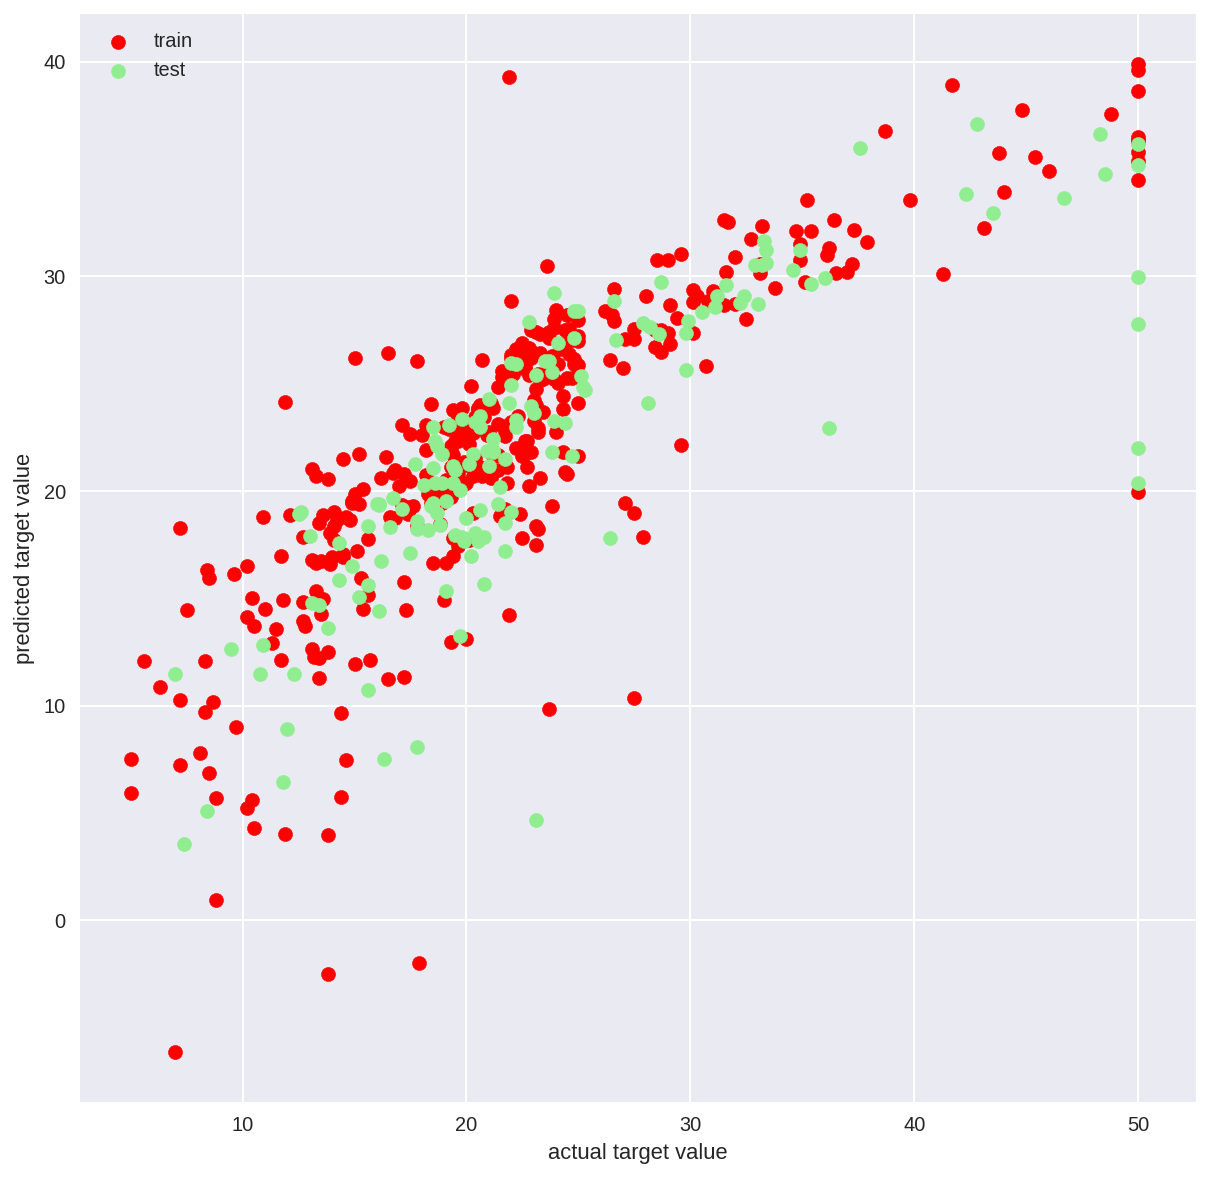

In [129]:
fig = plt.figure(figsize=(10,10))
plt.scatter(Y_train, lr.predict(X_train), c='r', label='train')
plt.scatter(Y_test, lr.predict(X_test), c='lightgreen', label='test')
plt.xlabel('actual target value')
plt.ylabel('predicted target value')
plt.legend()

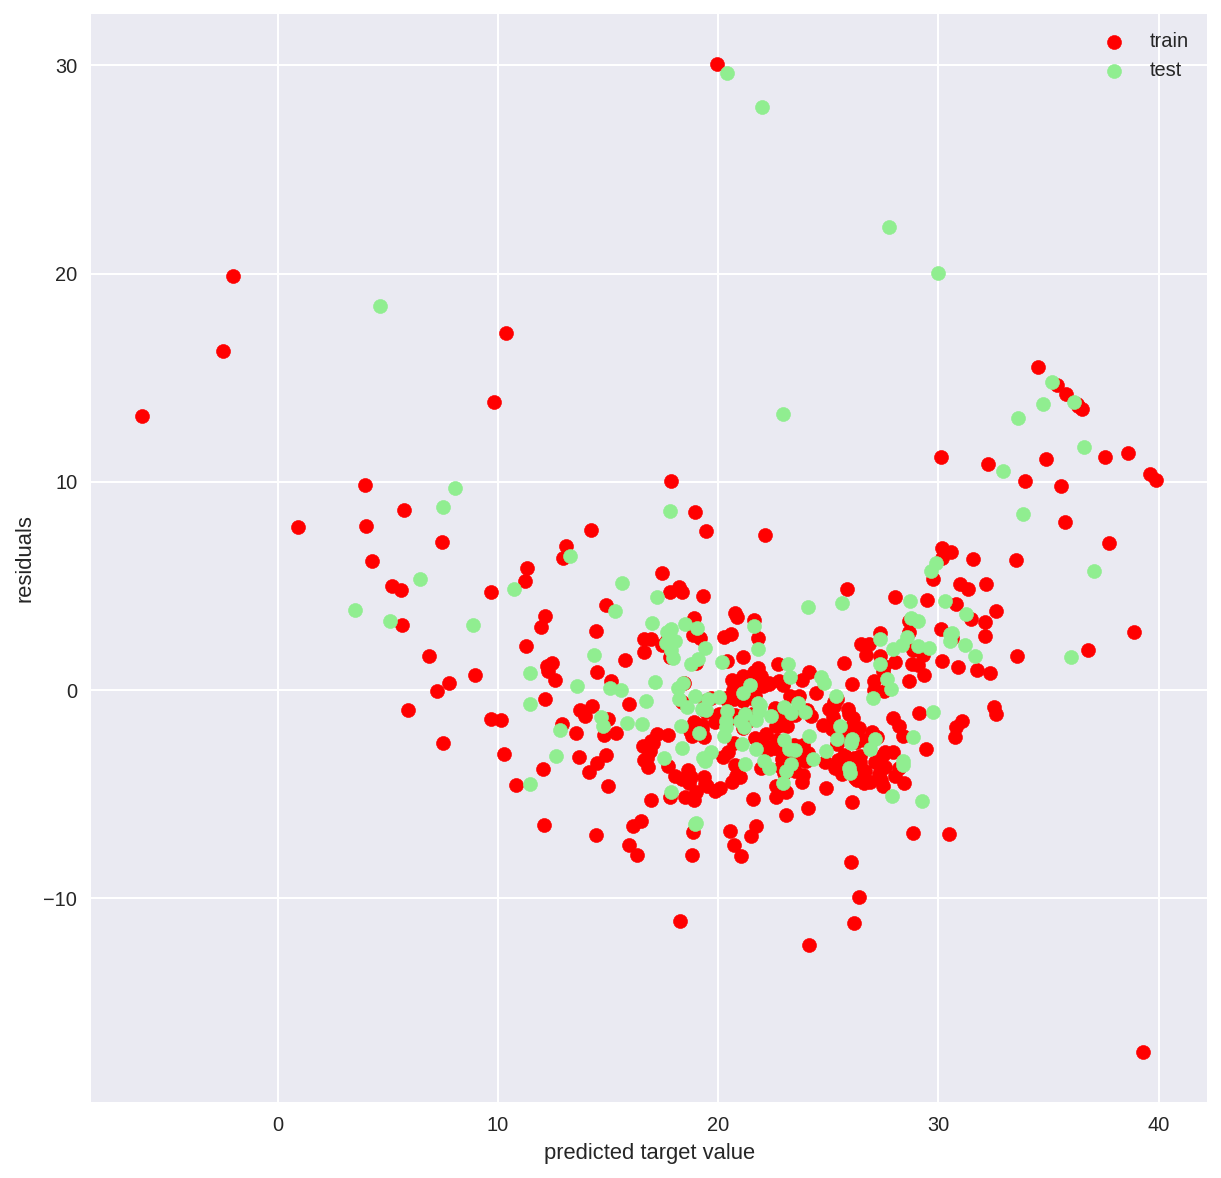

In [130]:
fig = plt.figure(figsize=(10,10))
plt.scatter(lr.predict(X_train), Y_train-lr.predict(X_train), c='r', label='train')
plt.scatter(lr.predict(X_test), Y_test-lr.predict(X_test),  c='lightgreen', label='test')
plt.xlabel('predicted target value')
plt.ylabel('residuals')
plt.legend()

## Sklearn LinearRegression comparison

In [86]:
ols= LinearRegression()
ols.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
ols.score(X_train, Y_train), mean_squared_error(Y_train, ols.predict(X_train))

(0.66712834633323925, 27.334860392696942)

In [88]:
ols.score(X_test, Y_test), mean_squared_error(Y_test, ols.predict(X_test))

(0.61286864832013177, 34.133026606046108)

In [120]:
ols.coef_

array([[-0.10829997,  5.34950839,  0.0104148 , -0.48197324]])